# Day 4 - Overfitting, Underfitting & Regularization
### Machine Learning Roadmap - Week 2 
### Author - N Manish Kumar 
---
Before improving a model, we must understand *why* it fails.

In machine learning, most model errors come from:
- Underfitting (high bias)
- Overfitting (high variance)

This notebook studies how regularization helps models generalize better.

---
## 1. Bias, Variance, Underfitting & Overfitting

### Underfitting (High Bias)
- Model is too simple
- Fails to capture patterns in data
- Performs poorly on both training and test data

### Overfitting (High Variance)
- Model is too complex
- Memorizes training data
- Performs well on training data but poorly on test data

### Bias–Variance Tradeoff
- Increasing model complexity reduces bias
- Increasing model complexity increases variance
- The goal is to find a balance that generalizes well

A good model is NOT the one with the highest training accuracy.

A good model is the one that performs well on unseen data.

---
## 2. Demonstrating Overfitting

To observe overfitting, we intentionally train a model with
**very weak regularization**.

In Logistic Regression (sklearn):
- Regularization strength is controlled by `C`
- Larger `C` → weaker regularization → more complex model

We compare:
- Training accuracy
- Test accuracy

A large gap indicates overfitting.


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

X = df.drop(columns=["target"])
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


### 2.1. Train Logistic Regression with Weak Regularization
We now set C = 1000

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Very weak regularization
model_overfit = LogisticRegression(C=1000, max_iter=500)
model_overfit.fit(X_train_s, y_train)

# Predictions
train_pred = model_overfit.predict(X_train_s)
test_pred = model_overfit.predict(X_test_s)

# Accuracy
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

train_acc, test_acc


(0.9956043956043956, 0.9298245614035088)

With very weak regularization (large C):

- Training accuracy becomes extremely high
- Test accuracy drops relative to training accuracy

This gap is a clear sign of overfitting.

---
## 3. Regularization (Intuition)

Overfitting happens when a model assigns very large weights to features,
allowing it to fit noise in the training data.

Regularization addresses this by **penalizing large weights**.

In Logistic Regression, this is done using **L2 regularization**.

### Regularized Logistic Regression Cost Function

The regularized cost function is:

$$
J(w, b) =
\frac{1}{m} \sum_{i=1}^{m}
\left[
- y^{(i)} \log(f_{w,b}(x^{(i)}))
- (1 - y^{(i)}) \log(1 - f_{w,b}(x^{(i)}))
\right]
+ \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
%=$$

Where:
- The first term measures prediction error
- The second term penalizes large weights
- $(\lambda)$ controls the strength of regularization

### Why Regularization Works

- Large weights make the model very sensitive to small input changes
- Sensitive models tend to overfit training data
- L2 regularization forces weights to stay small
- Smaller weights → smoother decision boundary → better generalization

### Why the Bias Term is Not Regularized

The bias term shifts the decision boundary but does not control its shape.

Regularizing the bias would:
- Not reduce overfitting meaningfully
- Unnecessarily restrict the model

Therefore, only the weights \(w\) are regularized, not the bias \(b\).

### Regularization in Sklearn

In sklearn's LogisticRegression:
- Regularization is enabled by default
- The parameter `C` is the inverse of regularization strength

$$
C = \frac{1}{\lambda}
$$

- Small C → strong regularization
- Large C → weak regularization

---
## 4. Effect of Regularization Strength

In Logistic Regression, regularization strength is controlled by the parameter `C`.

Relationship with regularization parameter λ:

$$
C = \frac{1}{\lambda}
$$

Interpretation:
- Small `C` → strong regularization → simpler model (high bias)
- Large `C` → weak regularization → complex model (high variance)

In this step, we train multiple Logistic Regression models with
different values of `C` and compare their performance on:
- Training data
- Test data



In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C_values = [0.01, 0.1, 1, 10, 100]

results = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=500)
    model.fit(X_train_s, y_train)
    
    train_pred = model.predict(X_train_s)
    test_pred = model.predict(X_test_s)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    results.append((C, train_acc, test_acc))

results


[(0.01, 0.9560439560439561, 0.9473684210526315),
 (0.1, 0.9868131868131869, 0.9736842105263158),
 (1, 0.989010989010989, 0.9824561403508771),
 (10, 0.9912087912087912, 0.9649122807017544),
 (100, 0.9934065934065934, 0.9473684210526315)]

### Observations

- Very small C (strong regularization):
  - Lower training accuracy
  - Similar or slightly lower test accuracy
  - Model is underfitting (high bias)

- Moderate C:
  - Training and test accuracy are both high
  - Small gap between them
  - Best generalization

- Very large C (weak regularization):
  - Extremely high training accuracy
  - Lower test accuracy
  - Model is overfitting (high variance)



In [5]:
# Convert results into a table
import pandas as pd

results_df = pd.DataFrame(
    results,
    columns=["C (Regularization)", "Train Accuracy", "Test Accuracy"]
)

results_df


,C (Regularization),Train Accuracy,Test Accuracy
0,0.01,0.956044,0.947368
1,0.10,0.986813,0.973684
2,1.00,0.989011,0.982456
3,10.00,0.991209,0.964912
4,100.00,0.993407,0.947368


Regularization controls model complexity.

The best model is NOT the one with the highest training accuracy,
but the one with the smallest gap between training and test performance.

--- 
## 5. Bias–Variance Tradeoff Visualization

To better understand the effect of regularization, we visualize
training and test accuracy as a function of regularization strength.

This helps identify:
- Underfitting region (high bias)
- Overfitting region (high variance)
- Optimal regularization strength


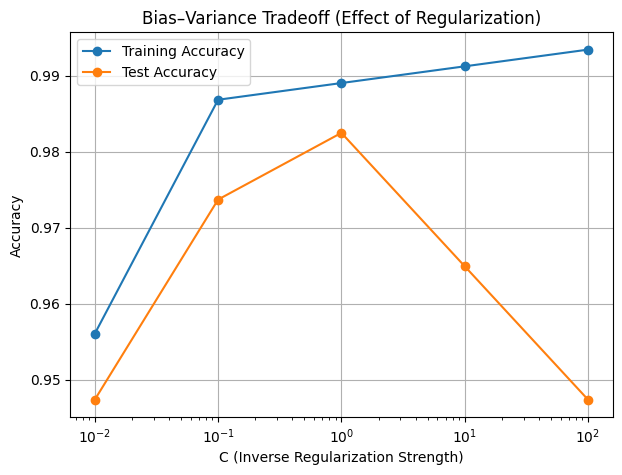

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

plt.plot(results_df["C (Regularization)"], results_df["Train Accuracy"],
         marker='o', label="Training Accuracy")
plt.plot(results_df["C (Regularization)"], results_df["Test Accuracy"],
         marker='o', label="Test Accuracy")

plt.xscale("log")
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Bias–Variance Tradeoff (Effect of Regularization)")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Choosing the best C
best_row = results_df.loc[results_df["Test Accuracy"].idxmax()]
best_row


C (Regularization)    1.000000
Train Accuracy        0.989011
Test Accuracy         0.982456
Name: 2, dtype: float64

The optimal value of C is the one that maximizes test accuracy
while keeping the gap between training and test accuracy small.

This value represents the best bias–variance tradeoff.

Regularization is a form of complexity control.

- Too much regularization → underfitting
- Too little regularization → overfitting
- Optimal regularization balances bias and variance

---
## 6. Regularization vs Threshold Tuning

Regularization tuning and threshold tuning affect different parts
of the machine learning pipeline.

Understanding the difference is critical for building reliable models.

### What Regularization Controls

Regularization controls **model complexity**.

In Logistic Regression with L2 regularization, the cost function is:

$$
J(w, b) =
\frac{1}{m} \sum_{i=1}^{m}
\left[
- y^{(i)} \log(f_{w,b}(x^{(i)}))
- (1 - y^{(i)}) \log(1 - f_{w,b}(x^{(i)}))
\right]
+ \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

Effects of regularization:
- Penalizes large weights
- Reduces overfitting
- Improves generalization
- Changes the **shape** of the decision boundary

### What Threshold Tuning Controls

Threshold tuning controls **decision behavior**, not model complexity.

Predictions are made as:

$$
\hat{y} =
\begin{cases}
1 & \text{if } P(y=1|x) \ge t \\
0 & \text{otherwise}
\end{cases}
$$

Effects of threshold tuning:
- Trades off precision and recall
- Does NOT change model weights
- Does NOT affect overfitting or underfitting
- Affects how conservative or aggressive predictions are

### Regularization vs Threshold Tuning (Comparison)

| Aspect | Regularization | Threshold Tuning |
|------|---------------|------------------|
| Acts on | Model training | Model prediction |
| Changes weights | Yes | No |
| Affects overfitting | Yes | No |
| Controls bias–variance | Yes | No |
| Controls precision–recall | No | Yes |
| Typical parameter | C (or λ) | Threshold t |

### When to Tune Regularization vs Threshold

- Tune **regularization (C)** when:
  - Model overfits or underfits
  - Training and test performance differ significantly

- Tune **threshold** when:
  - Precision and recall tradeoff matters
  - Cost of false positives vs false negatives is asymmetric

---
## 7. Final Model Selection and Evaluation

Based on the bias–variance analysis, we select the value of `C`
that provides the best generalization performance.

We retrain Logistic Regression using this optimal `C` and evaluate
the model using multiple metrics instead of accuracy alone.


In [9]:
# Train Final Regularized Logistic regression Model
best_C = best_row["C (Regularization)"]

final_model = LogisticRegression(C=best_C, max_iter=500)
final_model.fit(X_train_s, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",np.float64(1.0)
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- Fo

In [10]:
# Predictions
y_train_pred = final_model.predict(X_train_s)
y_test_pred = final_model.predict(X_test_s)

# Probabilities (for later use)
y_test_probs = final_model.predict_proba(X_test_s)[:, 1]


In [11]:
# Evaluate Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Final Model Performance (Best C)")
print("--------------------------------")
print("Training Accuracy :", accuracy_score(y_train, y_train_pred))
print("Test Accuracy     :", accuracy_score(y_test, y_test_pred))
print("Precision         :", precision_score(y_test, y_test_pred))
print("Recall            :", recall_score(y_test, y_test_pred))
print("F1 Score          :", f1_score(y_test, y_test_pred))


Final Model Performance (Best C)
--------------------------------
Training Accuracy : 0.989010989010989
Test Accuracy     : 0.9824561403508771
Precision         : 0.9861111111111112
Recall            : 0.9861111111111112
F1 Score          : 0.9861111111111112


In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[41,  1],
       [ 1, 71]])

After applying regularization:

- Training and test performance become closer
- Overfitting is reduced
- The model generalizes better to unseen data

Selecting the right regularization strength is crucial for
building reliable machine learning models.

---

## 8. Save Model

In [14]:
import joblib

# Save final regularized model
joblib.dump(final_model, "logistic_regression_regularized.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

---
# 📝 Day 4 Summary — Regularization, Overfitting & Bias–Variance

In this notebook, I studied the problem of overfitting and how
regularization helps improve model generalization.

## Concepts Covered
- Underfitting (high bias) vs Overfitting (high variance)
- Bias–variance tradeoff
- L2 regularization in Logistic Regression
- Effect of regularization strength (C) on model performance
- Difference between regularization tuning and threshold tuning

## Experiments Performed
- Trained Logistic Regression with very weak regularization to demonstrate overfitting
- Trained multiple models with different values of C
- Compared training and test accuracy across C values
- Visualized bias–variance tradeoff using plots
- Selected the optimal C based on test performance
- Trained and evaluated a final regularized model

## Key Takeaways
- High training accuracy alone is not a sign of a good model
- Regularization reduces overfitting by controlling model complexity
- The best model balances bias and variance
- Regularization tuning and threshold tuning solve different problems

This concludes Week 2 Day 4.
